Скачайте датасет House Prices Kaggle со страницы конкурса (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) и сохраните его в том же каталоге, что и ваш скрипт или блокнот Python.
Загрузите датасет в pandas DataFrame под названием df.

In [71]:
import pandas as pd
import numpy as np

In [72]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Выполните предварительную обработку данных, выполнив следующие шаги: a. Определите и обработайте отсутствующие значения в датасете. Определите, в каких столбцах есть отсутствующие значения, и решите, как их обработать (например, заполнить средним, медианой или модой, или отбросить столбцы/строки с существенными отсутствующими значениями). b. Проверьте и обработайте любые дублирующиеся строки в датасете. c. Проанализируйте типы данных в каждом столбце и при необходимости преобразуйте их (например, из объектных в числовые типы).

Выводим топ-20 столбцов по количеству пропущенных значений по убыванию.

In [73]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

Проверим сколько это в процентах от значений по столбцам.

In [74]:
def missingValuesInfo(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False) / len(df)*100, 2)
    temp = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return temp.loc[(temp['Total'] > 0)]

missingValuesInfo(df)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
MasVnrType,872,59.73
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageQual,81,5.55
GarageFinish,81,5.55
GarageType,81,5.55


Столбцы с существенным (40+) процентом отсутствующих значений отбрасываем. (Столбец ID тоже)
PoolQC - качество бассейна
MiscFeature - примечания
Alley - подъездная дорожка
Fence - забор
MasVnrType - тип каменной облицовки
FireplaceQu - качество камина

In [75]:
df = df.drop(columns = ['Alley', 'MasVnrType', 'Id', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'])

Обрабатываем оставшиеся столбцы, заменяя отсутсвующие значения на медиану.
Числовые значения отбираем через принадлежность к формату ['int64', 'float64']
Категориальные значения отбираем через принадлежность к формату ['object']

In [76]:
def HandleMissingValues(df):
    num_cols = [cname for cname in df.columns if df[cname].dtype in ['int64', 'float64']]
    cat_cols = [cname for cname in df.columns if df[cname].dtype == "object"]
    values = {}
    for a in cat_cols:
        values[a] = 'UNKNOWN'

    for a in num_cols:
        values[a] = df[a].median()
        
    df.fillna(value=values, inplace=True)
    
    
HandleMissingValues(df)
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

Ищем дублирующиеся строки в датасете.

In [80]:
df.duplicated().sum()

np.int64(0)

Дублей нет, анализируем типы данных.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

Проверим нужно ли преобразовывать тип объект в числовой.

In [83]:
for col in df.columns:
    if df[col].dtype == 'object':
        unique_values = df[col].unique()
        print(col, unique_values)

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkF

Делаем вывод, что преобразование не требуется.

Проведите разведочный анализ данных (EDA), ответив на следующие вопросы: a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? b. Исследуйте взаимосвязи между целевой переменной и другими характеристиками. Есть ли сильные корреляции? c. Исследуйте распределение и взаимосвязи других важных характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d. Визуализируйте данные, используя соответствующие графики (например, гистограммы, диаграммы рассеяния, квадратные диаграммы), чтобы получить представление о датасете.

In [84]:
df['SalePrice'].describe().round(2)

count      1460.0
mean     180921.2
std       79442.5
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

Бросается в глаза, что между 25 процентилем и минимальной ценой, а так же 75 процентилем и максимумом слишком большой разброс. Делаем вывод, что велика вероятность наличия выбросов.

<Axes: ylabel='SalePrice'>

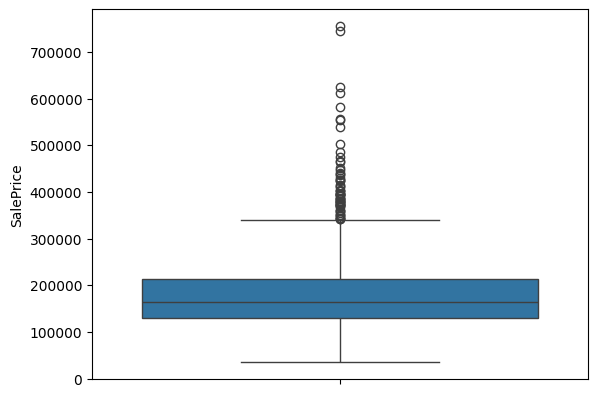

In [85]:
import seaborn as sns
sns.boxplot(df['SalePrice'])

На графике ящика с усами видим, что значения выше 400000 действуют как выбросы. Попробуем обнуружить выбросы в нашем датасете, используя Z-оценку.

In [86]:
from scipy import stats
z = np.abs(stats.zscore(df['SalePrice']))
print(z)

0       0.347273
1       0.007288
2       0.536154
3       0.515281
4       0.869843
          ...   
1455    0.074560
1456    0.366161
1457    1.077611
1458    0.488523
1459    0.420841
Name: SalePrice, Length: 1460, dtype: float64


Определяем выбросы на основании Z-оценки.

In [87]:
z_scores = stats.zscore(df['SalePrice'])
outliers_SalePrice = df[(z_scores < -3) | (z_scores > 3)]
print(outliers_SalePrice['SalePrice'])

58      438780
178     501837
185     475000
349     437154
389     426000
440     555000
473     440000
496     430000
527     446261
591     451950
664     423000
691     755000
769     538000
798     485000
803     582933
898     611657
1046    556581
1142    424870
1169    625000
1182    745000
1243    465000
1373    466500
Name: SalePrice, dtype: int64


Преобразуем данные с помощью логорифмирования для уменьшения влияния экстремельных значений.

In [88]:
df['SalePrice'] = np.log1p(df['SalePrice'])

Строим матрицу корреляций

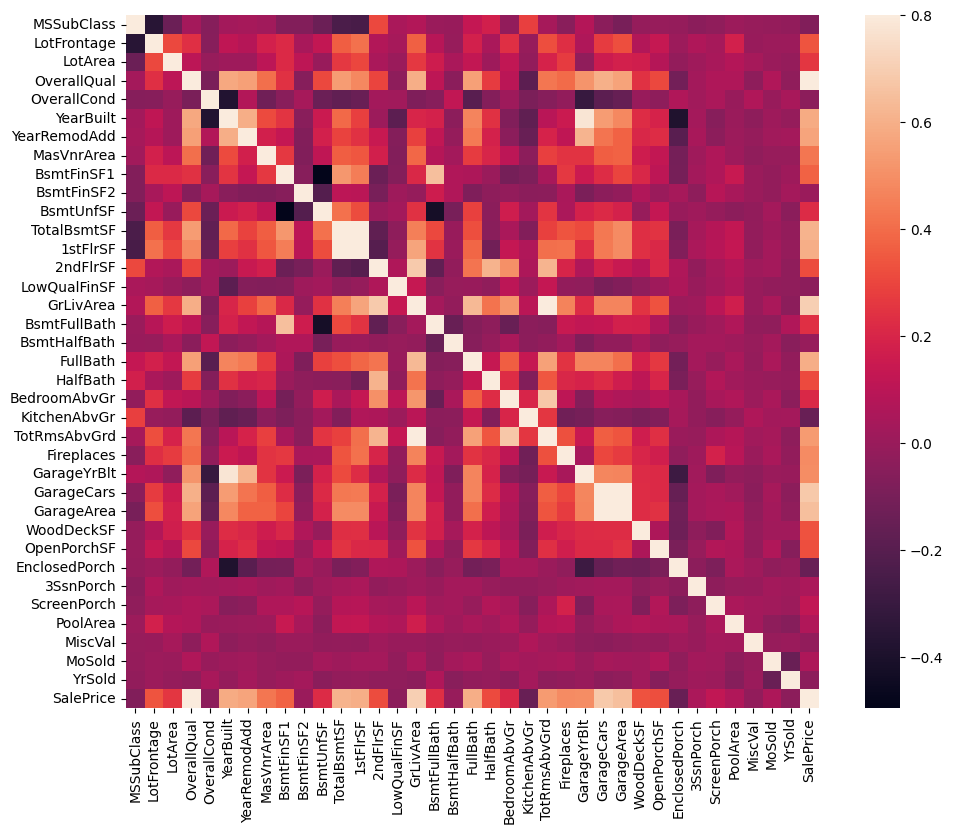

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

df_num = df.select_dtypes(include=[np.number])
corrmat = df_num.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Выводим 5 признаков с самым большим показателем корреляции и с самым низким.

In [90]:
corr = df_num.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:6], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.817185
GrLivArea      0.700927
GarageCars     0.680625
GarageArea     0.650888
TotalBsmtSF    0.612134
Name: SalePrice, dtype: float64 

YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64


Выделяем для себя признак-лидер - OverallQual (Общее качество материала и отделки). Рассмотрим подробнее значения в столбце OverallQual.

In [91]:
df.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

Построим сводную таблицу для пониманимания, как влияет значение от 1 - 10 в столбце OverallQual на SalePrice.

In [92]:
overall_qual_pivot = df.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc = 'mean').round(2)
overall_qual_pivot

,SalePrice
OverallQual,
1,10.80
2,10.83
3,11.34
4,11.56
5,11.78
6,11.97
7,12.22
8,12.50
9,12.79


Начинаем понимать, что чем выше значение в столбце OverallQual, тем выше средняя цена, но всё равно визуализируем для наглядности.

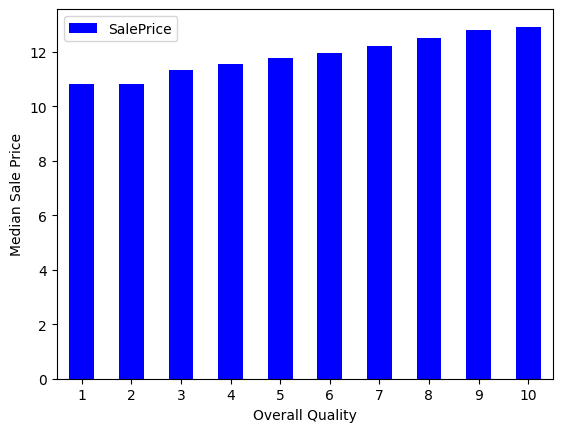

In [93]:
overall_qual_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Визулизируем корреляции всех 5 столбцов-лидеров и SalesPrice на графике пар.

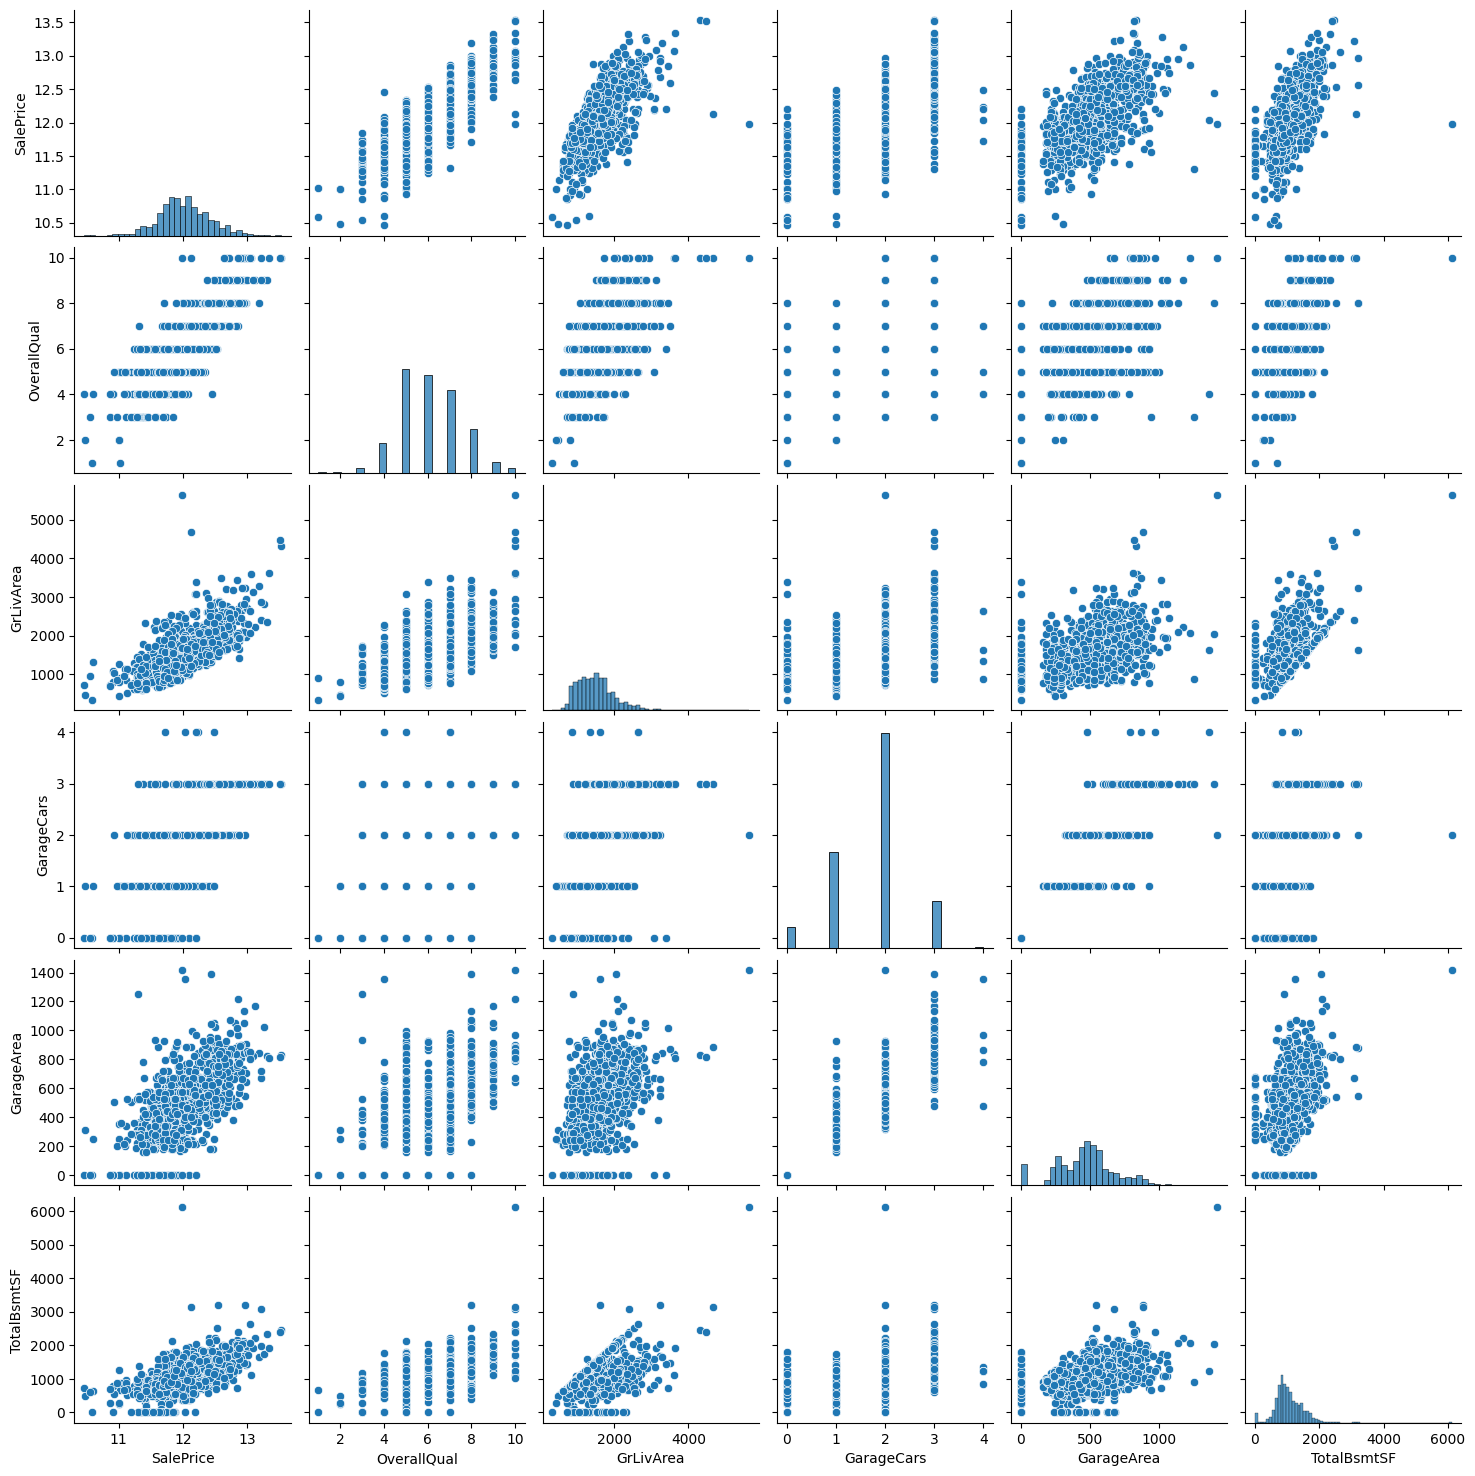

In [94]:
corr_colms = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']
df_corr = df[corr_colms]
sns.pairplot(df_corr)
plt.show()

Для сравнения посмотрим идентичный график для столбцов с антитоп-5 корреляций.

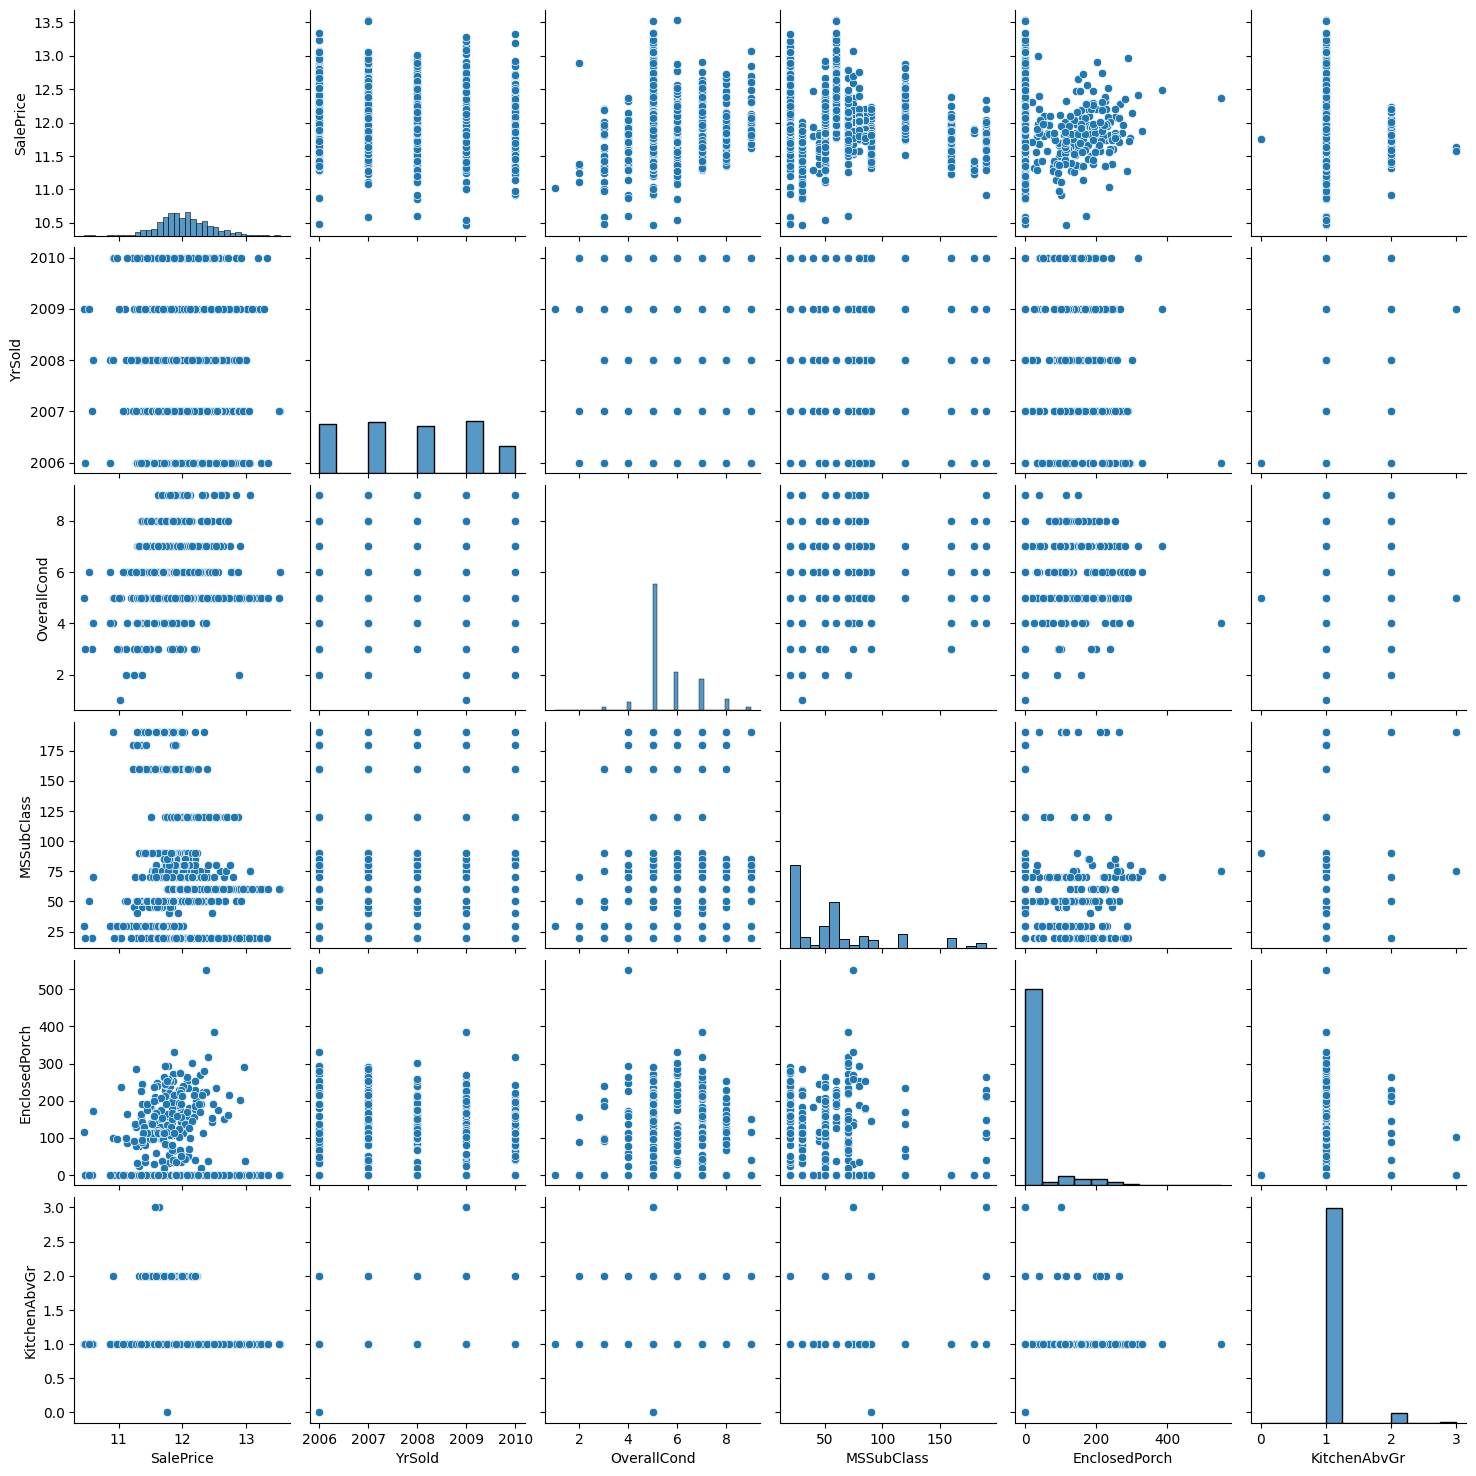

In [95]:
non_corr_colms = ['SalePrice', 'YrSold', 'OverallCond', 'MSSubClass', 'EnclosedPorch', 'KitchenAbvGr']
df_non_corr = df[non_corr_colms]
sns.pairplot(df_non_corr)
plt.show()

Выполните проектирование признаков путем реализации следующих преобразований: a. Работайте с категориальными переменными, применяя one-hot encoding или label encoding, в зависимости от характера переменной. b. При необходимости создайте новые характеристики, такие как общая площадь или возраст объекта недвижимости, путем объединения существующих характеристик.

Для выбора столбцов для преобразований, посмотрим на описание столбцов с категориальными значениями.

In [96]:
categoricals = df.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,6,4,7,7,4,6,6,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1334,735,1360,870,605,1311,1326,1340,1267,1198


In [97]:
df.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

Преобразуем столбец Street с помощью one-hot encoding.

In [98]:
df = pd.get_dummies(df, columns=['Street'], drop_first= True)

In [101]:
df.Street_Pave.unique()

array([ True, False])

Сохраните очищенный и преобразованный набор данных в новый CSV-файл под названием 'cleaned_house_prices.csv'.

In [105]:
df.to_csv('cleaned_house_prices.csv', index=False)